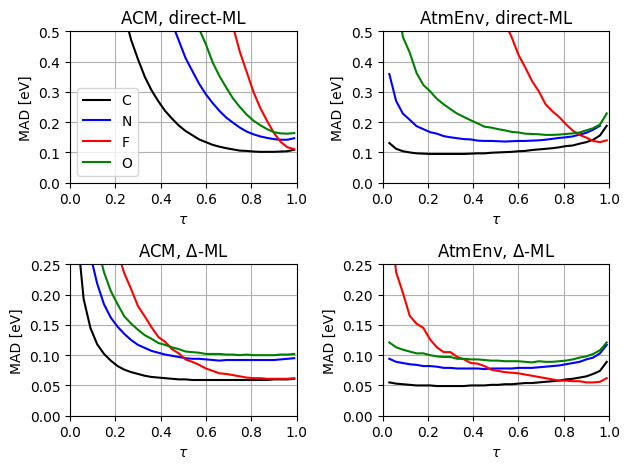

In [91]:
import numpy as np 
import matplotlib.pyplot as plt

atoms = ['C', 'N', 'F', 'O']
colors=['black','blue','red','green']
descriptors = ['ACM', 'AtmEnv']
desc=[['ACM, direct-ML','AtmEnv, direct-ML'],['ACM, $\\Delta$-ML','AtmEnv, $\\Delta$-ML']]
methods = ['direct', 'delta']
ymax=[[0.5,0.5],[0.25,0.25]]

fig, axes = plt.subplots(2,2)

for i in range(np.size(methods)):
    for j in range(np.size(descriptors)):
        ax = axes[i,j]
        for iatom,atom in enumerate(atoms):
            file_name = f"{atom}_{descriptors[j]}_{methods[i]}_tau_MAD.csv"
            with open (file_name,'r') as file: 
                comment = file.readline()
                lines = file.readlines()
            file.close()

            tau = []
            sigma = []
            mad = []

            for line  in lines:
                t,s,m = line.split(',') 
                tau.append(float(t))
                sigma.append(float(s))
                mad.append(float(m))

            ax.plot(tau,mad, label = atom,color=colors[iatom])
        
        ax.set_title(f"{desc[i][j]}")
        ax.set_xlabel('$\\tau$')
        ax.set_ylabel('MAD [eV]')
        ax.grid(True)
        ax.set_ylim(0.0,ymax[i][j])
        ax.set_xlim(0,1)
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig('tau.pdf',format='pdf',bbox_inches='tight')
plt.show()